<a href="https://colab.research.google.com/github/Kopfgeldjaeger/MNIST_even_odd_classification/blob/master/MNIST_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
cwd = os.getcwd()
print(cwd)
%ls 
print('\t')
from zipfile import ZipFile
file_name = 'mnistasjpg.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done.')
%ls

/content
mnistasjpg.zip  sample_data/
	
Done.
mnistasjpg.zip  testSample/  testSet.tar.gz   trainingSet/
sample_data/    testSet/     trainingSample/  trainingSet.tar.gz


In [0]:
import keras
import glob
import os
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,  array_to_img
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from keras import optimizers
from keras.models import Sequential
import numpy as np

a_files = glob.glob('trainingSet/trainingSet/0/*')
b_files = glob.glob('trainingSet/trainingSet/1/*')
c_files = glob.glob('trainingSet/trainingSet/2/*')
d_files = glob.glob('trainingSet/trainingSet/3/*')
e_files = glob.glob('trainingSet/trainingSet/4/*')
f_files = glob.glob('trainingSet/trainingSet/5/*')
g_files = glob.glob('trainingSet/trainingSet/6/*')
h_files = glob.glob('trainingSet/trainingSet/7/*')
i_files = glob.glob('trainingSet/trainingSet/8/*')
j_files = glob.glob('trainingSet/trainingSet/9/*')

Using TensorFlow backend.


In [0]:
A_files = [fn for fn in a_files ]+[fn for fn in c_files ]+[fn for fn in e_files ]+[fn for fn in g_files ]+[fn for fn in i_files ]
B_files = [fn for fn in b_files ]+[fn for fn in d_files ]+[fn for fn in f_files ]+[fn for fn in h_files ]+[fn for fn in j_files ]

In [0]:
import shutil
A_files = np.random.choice(A_files, size=20000, replace=False)
B_files = np.random.choice(B_files, size=20000, replace=False)
even_dir = 'even-data'
odd_dir = 'odd-data'
os.mkdir(even_dir) if not os.path.isdir(even_dir) else None
os.mkdir(odd_dir) if not os.path.isdir(odd_dir) else None
for fn in A_files:
    shutil.copy(fn, even_dir)

for fn in B_files:
    shutil.copy(fn, odd_dir)

In [0]:
import os.path
rootdir ="even-data/"       
i=0
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
       # print(os.path.join(parent, filename))  
        newName="E"+str(i)+".jpg"
        os.rename(os.path.join(parent, filename), os.path.join(parent, newName))
        i=i+1
rootdir ="odd-data/"       
i=0
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
       # print(os.path.join(parent, filename))  
        newName="O"+str(i)+".jpg"
        os.rename(os.path.join(parent, filename), os.path.join(parent, newName))
        i=i+1

In [0]:
E_files = glob.glob('even-data/*')
O_files = glob.glob('odd-data/*')
e_files =[img for img in E_files]
o_files =[img for img in O_files]
e_train = np.random.choice(e_files, size=15000, replace=False)
o_train = np.random.choice(o_files, size=15000, replace=False)
e_files = list(set(e_files) - set(e_train))
o_files = list(set(o_files) - set(o_train))
e_val = np.random.choice(e_files, size=2000, replace=False)
o_val = np.random.choice(o_files, size=2000, replace=False)
e_files = list(set(e_files) - set(e_val))
o_files = list(set(o_files) - set(o_val))
e_test = np.random.choice(e_files, size=3000, replace=False)
o_test = np.random.choice(o_files, size=3000, replace=False)
train_dir = 'training-data'
val_dir = 'validation-data'
test_dir ='test-data'

train_files = np.concatenate([e_train,o_train])
validate_files = np.concatenate([e_val,o_val])
test_files = np.concatenate([e_test,o_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)    

In [0]:
image_size=(28,28)
from keras import backend as K
import cv2

train_files = glob.glob('training-data/*')


train_imgs = [img_to_array(load_img(img, color_mode='grayscale',target_size=image_size)) for img in train_files]
validation_files = glob.glob('validation-data/*')
validation_imgs = [img_to_array(load_img(img, color_mode='grayscale',target_size=image_size)) for img in validation_files]
train_imgs = np.array(train_imgs)

validation_imgs = np.array(validation_imgs)

if K.image_data_format() == 'th':
    train_imgs = train_imgs.reshape(train_imgs.shape[0], 1, 28,28)
    validation_imgs = validation_imgs.reshape(validation_imgs.shape[0], 1,28,28)
    input_shape = (1, 28,28)
else:
    train_imgs = train_imgs.reshape(train_imgs.shape[0], 28,28, 1)
    validation_imgs = validation_imgs.reshape(validation_imgs.shape[0], 28,28, 1)
    input_shape = (28,28, 1)


train_labels = [fn.split('/')[1].strip()[0:1] for fn in train_files]

validation_labels = [fn.split('/')[1].strip()[0:1] for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,
      '\tprint_train_labels[795:805]',train_labels[795:805])

Train dataset shape: (30000, 28, 28, 1) 	Validation dataset shape: (4000, 28, 28, 1) 	print_train_labels[795:805] ['E', 'E', 'E', 'O', 'E', 'O', 'E', 'E', 'E', 'O']


In [0]:
num_classes = 2
epochs = 50
input_shape = (100, 100,1)

# encode text category labels
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

train_labels_array = np.array(train_labels)
# integer encode
le = LabelEncoder()
train_integer_encoded = le.fit_transform(train_labels_array)

validation_labels_array = np.array(validation_labels)

validation_integer_encoded = le.fit_transform(validation_labels_array)

In [0]:
trdata = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
traindata = trdata.flow(train_imgs,train_integer_encoded,batch_size=150)
valdata = ImageDataGenerator(rescale=1./255)
validationdata = valdata.flow(validation_imgs ,validation_integer_encoded,batch_size=100)

In [0]:
from keras import layers
from keras.models import Model

def lenet_5(in_shape=(28,28,1), n_classes=2, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=20, kernel_size=5,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=5,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(500, activation='relu')(flatten)
    preds = layers.Dense(1, activation='sigmoid')(dense1)

    model = Model(in_layer, preds)
    model.compile(loss="binary_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = lenet_5()
    print(model.summary())







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________




Epoch 1/50





200/200 [==============================] - 23s 113ms/step - loss: 0.6829 - acc: 0.5612 - val_loss: 0.6583 - val_acc: 0.6197

Epoch 00001: val_acc improved from -inf to 0.61975, saving model to lenet_mnist.h5
Epoch 2/50
200/200 [==============================] - 8s 39ms/step - loss: 0.6650 - acc: 0.6225 - val_loss: 0.6144 - val_acc: 0.7278

Epoch 00002: val_acc improved from 0.61975 to 0.72775, saving model to lenet_mnist.h5
Epoch 3/50
200/200 [==============================] - 8s 40ms/step - loss: 0.6394 - acc: 0.6608 - val_loss: 0.5636 - val_acc: 0.7472

Epoch 00003: val_acc improved from 0.72775 to 0.74725, saving model to lenet_mnist.h5
Epoch 4/50
200/200 [==============================] - 8s 40ms/step - loss: 0.6168 - acc: 0.6694 - val_loss: 0.5282 - val_acc: 0.7660

Epoch 00004: val_acc improved from 0.74725 to 0.76600, saving model to lenet_mnist.h5
Epoch 5/50
200/200 [==============================] - 8s 40ms/step - loss: 0.5911 - acc: 0.6897 - val_loss: 0.522

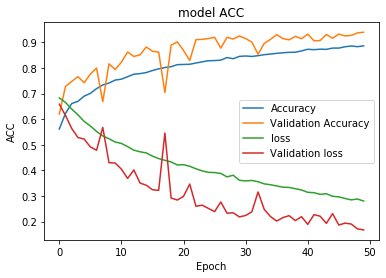

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("lenet_mnist.h5",monitor='val_acc',verbose=1,save_best_only=True,
                             save_weights_only= False,
                             mode ='auto',period=1)
early = EarlyStopping(monitor='val_acc',min_delta=0,patience=20,verbose=1,mode='auto')

             
history = model.fit_generator(traindata, steps_per_epoch=200, epochs=50,
                              validation_data=validationdata, validation_steps=40, 
                              callbacks=[checkpoint,early]
                              
                              )  
import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"]) 
plt.title("model ACC")
plt.ylabel("ACC")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation loss"])
plt.show()

In [0]:
from keras.models import load_model
import model_evaluation_utils as meu
basic_cnn= load_model('lenet_mnist.h5')
test_files = glob.glob('test-data/*')


test_imgs = [img_to_array(load_img(img, color_mode='grayscale', target_size=(28,28))) for img in test_files]

test_imgs = np.array(test_imgs)

test_labels = [fn.split('/')[1].strip()[0:1] for fn in test_files]
test_imgs_scaled = test_imgs.astype('float32')

test_imgs_scaled /= 255
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

test_labels_array = np.array(test_labels)
# integer encode
le = LabelEncoder()
test_integer_encoded = le.fit_transform(test_labels_array)


print('Test dataset shape:', test_imgs.shape)

print(test_integer_encoded[0:5])

Test dataset shape: (6000, 28, 28, 1)
[0 0 0 1 1]


In [0]:
num2class_label_transformer = lambda l: ['E' if x < 0.5 else 'O' for x in l]


predictions = basic_cnn.predict(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
print(predictions)



meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 

                                      classes=list(set(test_labels)))

['E', 'E', 'E', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'E', 'E', 'E', 'E', 'O', 'E', 'E', 'E', 'E', 'E', 'E', 'O', 'O', 'O', 'O', 'E', 'E', 'E', 'O', 'O', 'O', 'E', 'E', 'O', 'E', 'E', 'O', 'E', 'O', 'E', 'O', 'E', 'E', 'E', 'E', 'E', 'E', 'O', 'E', 'O', 'E', 'O', 'O', 'E', 'E', 'O', 'E', 'O', 'E', 'O', 'E', 'O', 'O', 'O', 'E', 'E', 'O', 'E', 'O', 'O', 'O', 'E', 'O', 'E', 'O', 'O', 'O', 'E', 'O', 'O', 'O', 'O', 'O', 'E', 'E', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'O', 'E', 'E', 'E', 'O', 'E', 'E', 'E', 'O', 'O', 'E', 'O', 'E', 'O', 'E', 'O', 'E', 'E', 'O', 'E', 'O', 'O', 'E', 'E', 'O', 'O', 'O', 'E', 'E', 'E', 'O', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'O', 'E', 'E', 'E', 'E', 'O', 'O', 'E', 'O', 'E', 'E', 'E', 'E', 'O', 'O', 'E', 'E', 'E', 'E', 'O', 'O', 'O', 'O', 'O', 'E', 'E', 'O', 'O', 'O', 'O', 'E', 'E', 'O', 'O', 'O', 'O', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'E', 'O', 'O', 'O', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'E', 'O', 'O', 'E', 'E',

/content/model_evaluation_utils.py:122: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/content/model_evaluation_utils.py:126: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [0]:
import shutil
shutil.rmtree('even-data')
shutil.rmtree('odd-data')
shutil.rmtree('test-data')
shutil.rmtree('validation-data')
shutil.rmtree('training-data')
